# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [91]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from scipy.stats import linregress
import pprint as pp
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [92]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) ## test with size of 5 vs 1500 - change back!!
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500) ## test with size of 5 vs 1500 - change back!!
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total = len(cities)
print(f'total cities: {total}')

total cities: 626


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [93]:

# lists to construct dataframe
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# elements of query
url = "http://api.openweathermap.org/data/2.5/weather?"

params = {
    'appid': weather_api_key,
    'units': 'imperial'
}

# set count value to track number of records processed
count = 1

print(f'Beginning data retrieval')
print(f'------------------------------------------')

# iterate over list of cities
for city in cities:
    
    # set search city for API
    params['q'] = city
    
    # API call to openweathermap.org
    response = requests.get(url, params=params).json()
    
    # populate lists with API data for each city
    try:
        city_name.append(response['name'])
        print(f'Processing record {count} of {total} | {city}')
        try:
            lat.append(response.get('coord').get('lat'))
            lng.append(response.get('coord').get('lon'))
            max_temp.append(response.get('main').get('temp_max'))
            humidity.append(response.get('main').get('humidity'))
            cloudiness.append(response.get('clouds').get('all'))
            wind_speed.append(response.get('wind').get('speed'))
            country.append(response.get('sys').get('country'))
            date.append(response.get('dt'))
        except:
            print(Exception)
    except(KeyError):
        print('Missing city. Skipping....')
    
    # increment count of records being processed
    count += 1

# create dictionary from populated lists
dict = {
    'City': city_name,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}

# convert dictionary to dataframe
cities_df = pd.DataFrame(dict)

Beginning data retrieval
------------------------------------------
Processing record 1 of 626 | ekhabi
Processing record 2 of 626 | mahon
Processing record 3 of 626 | siuna
Processing record 4 of 626 | bethel
Processing record 5 of 626 | loandjili
Processing record 6 of 626 | nara
Missing city. Skipping....
Processing record 8 of 626 | tiverton
Processing record 9 of 626 | bambous virieux
Processing record 10 of 626 | nome
Processing record 11 of 626 | muscat
Processing record 12 of 626 | praya
Processing record 13 of 626 | naze
Processing record 14 of 626 | tasiilaq
Processing record 15 of 626 | jamestown
Processing record 16 of 626 | morondava
Processing record 17 of 626 | lorengau
Processing record 18 of 626 | puerto ayora
Processing record 19 of 626 | ushuaia
Processing record 20 of 626 | port macquarie
Missing city. Skipping....
Processing record 22 of 626 | porto novo
Processing record 23 of 626 | mahebourg
Processing record 24 of 626 | dikson
Processing record 25 of 626 | rawso

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [95]:
# display dataframe
cities_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
567,Bijie,27.3125,105.2942,61.45,65,96,3.56,CN,1666409062
568,Port Hardy,50.6996,-127.4199,46.58,93,100,3.44,CA,1666409063
569,Maxixe,-23.8597,35.3472,69.22,88,0,1.12,MZ,1666409063
570,Corn Island,12.1694,-83.0418,83.07,75,5,11.79,NI,1666409063
571,Schmalkalden,50.7167,10.4500,57.11,98,100,5.79,DE,1666409064


In [96]:
# describe numeric data
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,5.720000e+02
mean,20.136611,19.375394,61.075140,73.050699,57.858392,7.353112,1.666409e+09
std,32.439360,88.526700,19.171867,20.248782,40.947951,5.510425,7.163261e+01
min,-54.800000,-175.200000,0.840000,11.000000,0.000000,0.000000,1.666409e+09
25%,-6.155350,-56.211525,48.320000,63.000000,11.750000,3.440000,1.666409e+09
50%,22.622500,21.883350,65.345000,78.000000,75.000000,5.960000,1.666409e+09
75%,47.114775,95.523775,76.037500,89.000000,100.000000,9.670000,1.666409e+09
max,78.218600,179.316700,103.870000,100.000000,100.000000,43.730000,1.666409e+09


In [97]:
# save city data to csv
cities_df.to_csv('output_data/cities_weather.csv',index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [102]:
# filter for cities with humidity greater than zero and save to a dataframe
humidity_error_df = cities_df.loc[cities_df['Humidity'] > 100]
print(f'Number of cities with humidity value higher than 100%: {len(humidity_error_df)}')

Number of cities with humidity value higher than 100%: 0


In [103]:
#  Get the indices of cities that have humidity over 100%.
h_err_index = humidity_error_df.index.to_list()
h_err_index


[]

In [104]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
clean_city_data = cities_df.loc[set(cities_df.index) - set(h_err_index)]
clean_city_data.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
567,Bijie,27.3125,105.2942,61.45,65,96,3.56,CN,1666409062
568,Port Hardy,50.6996,-127.4199,46.58,93,100,3.44,CA,1666409063
569,Maxixe,-23.8597,35.3472,69.22,88,0,1.12,MZ,1666409063
570,Corn Island,12.1694,-83.0418,83.07,75,5,11.79,NI,1666409063
571,Schmalkalden,50.7167,10.4500,57.11,98,100,5.79,DE,1666409064


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

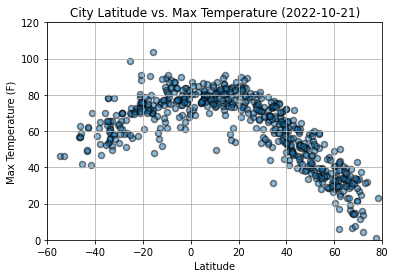

In [106]:
# x and y values
latitude = clean_city_data['Lat']
m_temp = clean_city_data['Max Temp']

# convert unix date value to yyyy-mm-dd
dt_converted = datetime.date.fromtimestamp(max(cities_df['Date']))

# scatter plot paramters
plt.scatter(latitude,m_temp,alpha=0.5,edgecolors='black',linewidths=1.5)
plt.grid()
plt.ylim(0,round((max(m_temp)+10)/20)*20)
plt.xlim((round((min(latitude)-10)/20)*20),(round((max(latitude)+10)/20)*20))
plt.title(f'City Latitude vs. Max Temperature ({dt_converted})')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')

# save figure as png
plt.savefig('output_data/lat_max_temp.png')
plt.show()


## Latitude vs. Humidity Plot

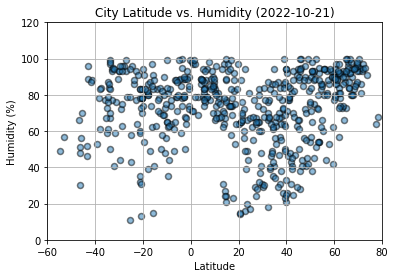

In [110]:
# y values
h_data = clean_city_data['Humidity']

# scatter plot parameters
plt.scatter(latitude,h_data,alpha=0.5,edgecolors='black',linewidths=1.5)
plt.grid()
plt.ylim(0,round((max(h_data)+10)/20)*20)
plt.xlim((round((min(latitude)-10)/20)*20),(round((max(latitude)+10)/20)*20))
plt.title(f'City Latitude vs. Humidity ({dt_converted})')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# save figure to png
plt.savefig('output_data/lat_humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

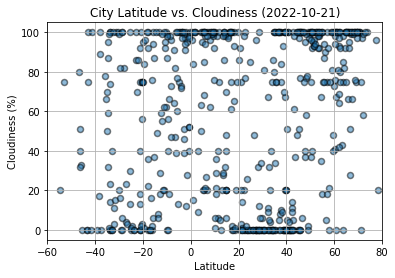

In [113]:
# y values
c_data = clean_city_data['Cloudiness']

# scatter plot parameters
plt.scatter(latitude,c_data,alpha=0.5,edgecolors='black',linewidths=1.5)
plt.grid()
plt.ylim(-5,105)
plt.xlim((round((min(latitude)-10)/20)*20),(round((max(latitude)+10)/20)*20))
plt.title(f'City Latitude vs. Cloudiness ({dt_converted})')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# save figure to plt
plt.savefig('output_data/lat_clouds.png')
plt.show()

## Latitude vs. Wind Speed Plot

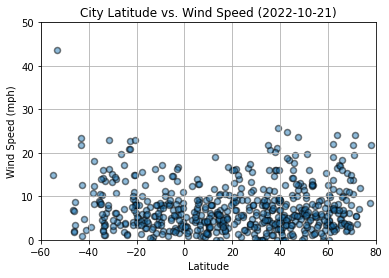

In [114]:
w_data = clean_city_data['Wind Speed']

plt.scatter(latitude,w_data,alpha=0.5,edgecolors='black',linewidths=1.5)
plt.grid()
plt.ylim(0,round((max(w_data)+5)/10)*10)
plt.xlim((round((min(latitude)-10)/20)*20),(round((max(latitude)+10)/20)*20))
plt.title(f'City Latitude vs. Wind Speed ({dt_converted})')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

plt.savefig('output_data/lat_wind.png')
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression